In [1]:
import random 
import nltk

from nltk.corpus import twitter_samples
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
pos_tweets = [(string, 1) for string in twitter_samples.strings('positive_tweets.json')] # load positive tweets from twitter samples json
neg_tweets = [(string, 0) for string in twitter_samples.strings('negative_tweets.json')] # load negative tweets from twitter samples json
pos_tweets.extend(neg_tweets) # combine positive and negative tweets
comb_tweets = pos_tweets
random.shuffle(comb_tweets) # shuffle combined tweets
tweets, labels = (zip(*comb_tweets)) # unzip tweets and labels

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=10000) # Generate features with max quanity of 10000 and both unigram and bigram features
X = count_vectorizer.fit_transform(tweets) # 

- Unigram features: usually single word features. Can be used to capture words.
- Bigram features: usually two word features. Can be used to capture phrases.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)
# split the data into training and testing sets(ratio: 8:2)

In [9]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=10) # crete a random forest classifier with 100 trees, 4 cores and a random state of 10
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=10)

In [10]:
preds = rf.predict(X_test)
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.7495
[[795 212]
 [289 704]]


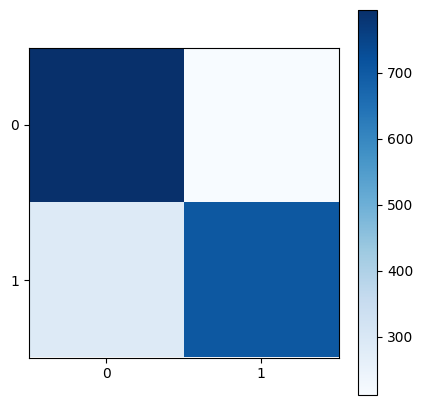

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5, 5))
plt.xticks(np.arange(len(rf.classes_)), rf.classes_)
plt.yticks(np.arange(len(rf.classes_)), rf.classes_)
plt.imshow(confusion_matrix(y_test, preds), cmap=plt.cm.Blues)
plt.colorbar()

In [ ]:
from nltk.corpus import stopwords 
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, stop_words=stopwords.words('english'))
X = tfidf.fit_transform(tweets)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=10)
rf.fit(X_train, y_train) 

RandomForestClassifier(n_jobs=4, random_state=10)

In [20]:
preds = rf.predict(X_test)
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.7125
[[751 214]
 [361 674]]


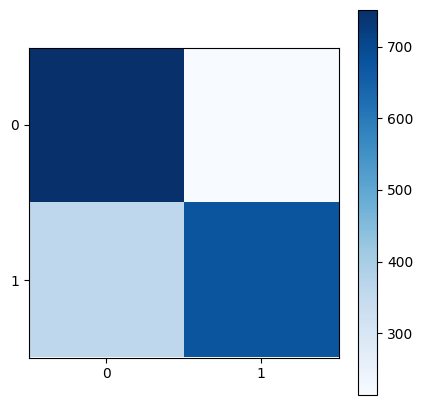

In [21]:
plt.figure(figsize=(5, 5))
plt.xticks(np.arange(len(rf.classes_)), rf.classes_)
plt.yticks(np.arange(len(rf.classes_)), rf.classes_)
plt.imshow(confusion_matrix(y_test, preds), cmap=plt.cm.Blues)
plt.colorbar()

## Conclusion
In this project, i used Natural Language Processing (NLP) techniques to analyze customer reviews of a popular online shopping website. We cleaned and preprocessed the data, performed sentiment analysis using a pre-trained model, and visualized the results. The insights gained from this analysis can help businesses improve their customer satisfaction and improve their product quality.

While, remove stopwords probably improve the accurancy of the model. The accruancy of the model is still not very high, but it can be improved by using more advanced techniques such as word embeddings or deep learning models. And the accurancy of the model depends on the quality of the training data as well.